In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7facdf6d1a30>,
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [10]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7face126b610>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [11]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(Measurement.date)).all()
most_recent

[('2017-08-23',)]

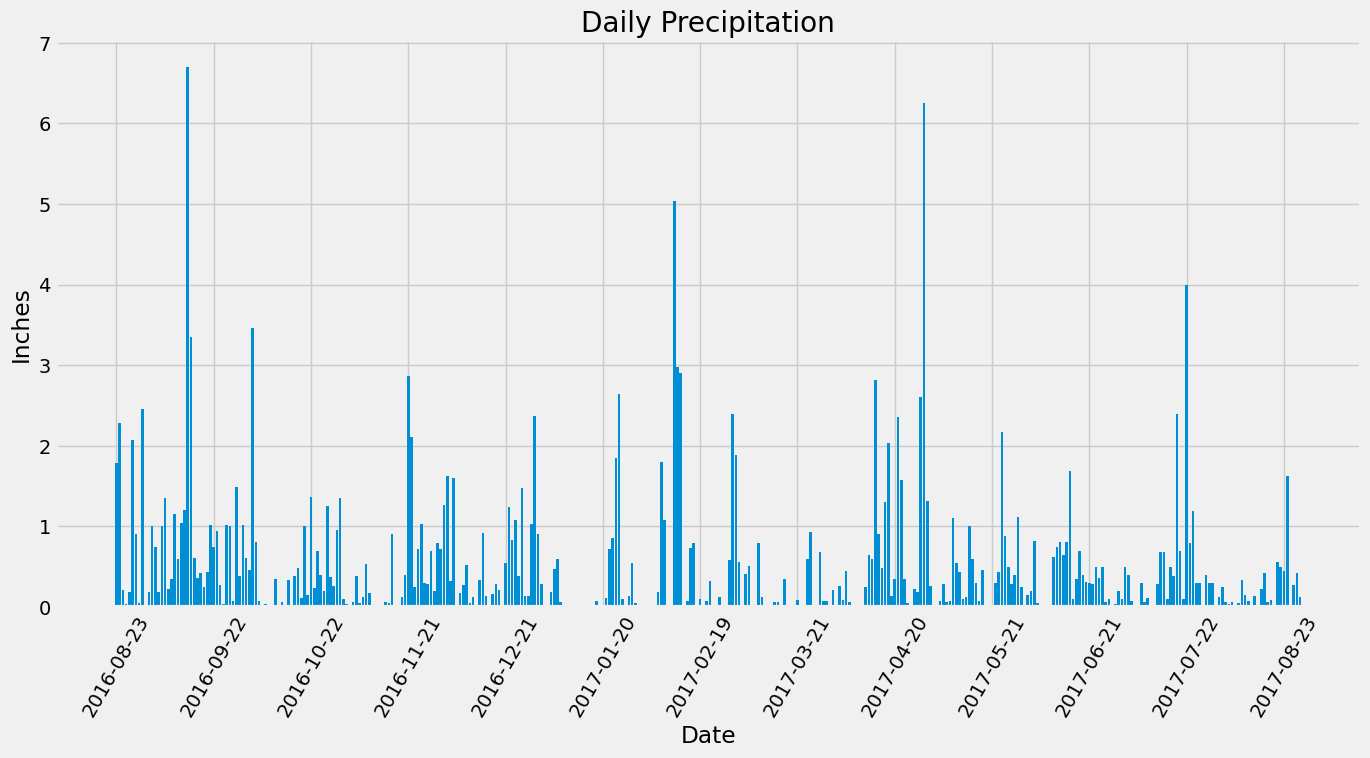

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
end_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= end_date)

# Save the query results as a Pandas DataFrame and set the index to the date column
latest_precip = [{"Date": precip[0], "Precip": precip[1]} for precip in precip_data]

latest_precip_df = pd.DataFrame(latest_precip)

# Sort the dataframe by date
latest_precip_df.sort_values(by="Date")
latest_precip_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
x_date = latest_precip_df["Date"]
y_precip = latest_precip_df["Precip"]

plt.figure(figsize=(15, 7))
plt.bar(x_date, y_precip, align="center")

plt.xticks(np.arange(0, 366, 30), rotation=60)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Daily Precipitation")
plt.show()


In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
latest_precip_df.describe()

,Precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [108]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

counts


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
stations = session.query(Station.station, Station.id).all()
stations

[('USC00519397', 1),
 ('USC00513117', 2),
 ('USC00514830', 3),
 ('USC00517948', 4),
 ('USC00518838', 5),
 ('USC00519523', 6),
 ('USC00519281', 7),
 ('USC00511918', 8),
 ('USC00516128', 9)]

In [120]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station7 = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00511918").all()
station7


[(87.0, 53.0, 71.61596766043456)]

In [135]:
most_recent7 = session.query(func.max(Measurement.date)).\
    filter(Measurement.station == "USC00511918").all()
most_recent7

[('2015-10-30',)]

In [151]:
session.query(Station.name).\
    filter(Station.station == "USC00511918").all()

[('HONOLULU OBSERVATORY 702.2, HI US',)]

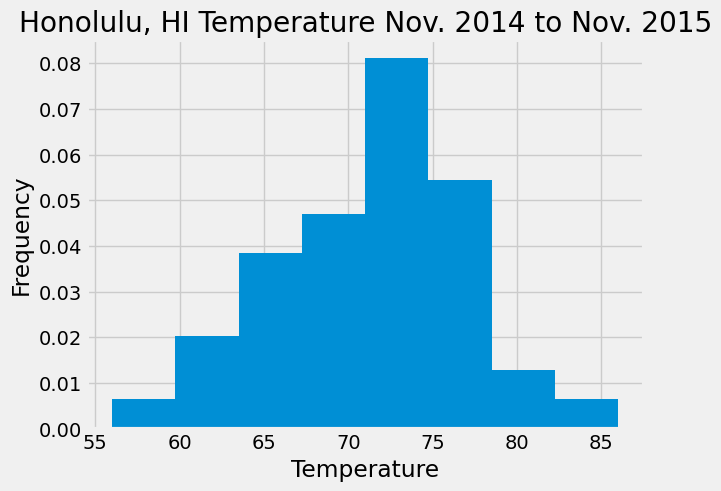

In [150]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
end_date = dt.date(2015, 10, 30) - dt.timedelta(days=365)

station7_data = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.station == "USC00511918").\
    filter(Measurement.date >= end_date).all()

station7_temp = [{"Date": station[0], "Temp": station[2]} for station in station7_data]
temp_df = pd.DataFrame(station7_temp)

x = temp_df["Temp"]
n_bins = 8   
plt.hist(x, n_bins, density = True, 
         histtype ='bar')
plt.title("Honolulu, HI Temperature Nov. 2014 to Nov. 2015")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()